In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv("Mall_Customers.csv")

In [136]:
df.shape

(200, 5)

In [137]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [138]:
df = df.drop("CustomerID", axis = 1)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [140]:
df["Gender"] = pd.get_dummies(df['Gender'],dtype=int, drop_first=True)

# Data Visualization

([<matplotlib.patches.Wedge at 0x15dea804b00>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')])

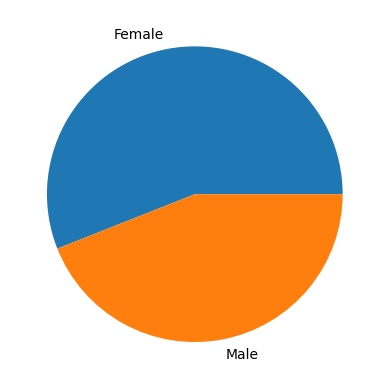

In [141]:
plt.pie(df['Gender'].value_counts(), labels = ['Female', 'Male'])

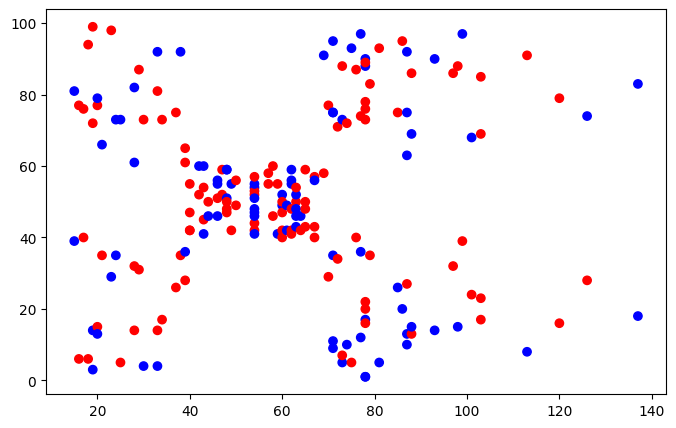

In [142]:
colors = {1: 'blue', 0: 'red'}

# Create a scatter plot
plt.figure(figsize=(8,5))
plt.scatter(
    x=df['Annual Income (k$)'], 
    y=df['Spending Score (1-100)'], 
    c=df['Gender'].map(colors),  # Map gender to colors
    label=df['Gender']
)

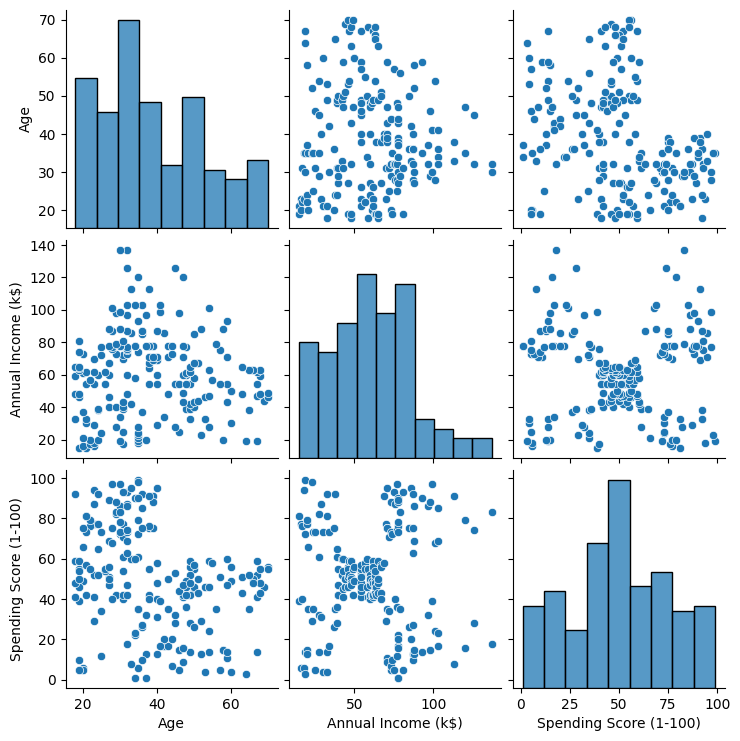

In [143]:
sns.pairplot(df.iloc[:,1:])

In [144]:
import plotly.graph_objects as go

In [145]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [147]:
fig = go.Figure(data=[go.Scatter3d(
    x=df['Age'],  # x coordinates
    y=df['Annual Income (k$)'],  # y coordinates
    z=df['Spending Score (1-100)'],  # z coordinates
    mode='markers',  # display points
    marker=dict(
        size=5,
        color=df['Gender'],  # set color based on hue factor
        colorscale='Viridis',  # color scale
        opacity=0.8,
        colorbar=dict(title="Hue Factor")  # colorbar legend for hue factor
    )
)])


fig.update_layout(
    scene=dict(
        xaxis_title='AGE',
        yaxis_title='ANNUAL INCOME',
        zaxis_title='SPENDING SCORE'
    ),
    title="MALL CUSTOMER SEGREGATION",
    height = 700
)


fig.show()

In [148]:
df_copy = df.copy()

In [149]:
from sklearn.cluster import KMeans

In [150]:
km = KMeans()

In [151]:
km.fit_predict(df)

array([6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 1,
       6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 5, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 5, 3, 4, 3, 4, 3, 5, 3, 4, 3, 5, 3, 5, 3,
       5, 3, 4, 3, 4, 3, 5, 3, 4, 3, 5, 3, 5, 3, 5, 3, 5, 3, 4, 3, 5, 3,
       5, 3, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 0, 7, 0, 7, 0, 7,
       0, 7])

In [152]:
from sklearn.model_selection import cross_val_score

In [153]:
km.inertia_

58528.104282234

In [154]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [155]:
wcss

[308862.06,
 219862.2175438596,
 143391.59236035674,
 104422.83498539748,
 97216.8720516569,
 58350.65449462818,
 51575.27793107792,
 51350.95161088911,
 40655.68621378621,
 37587.17771512115]

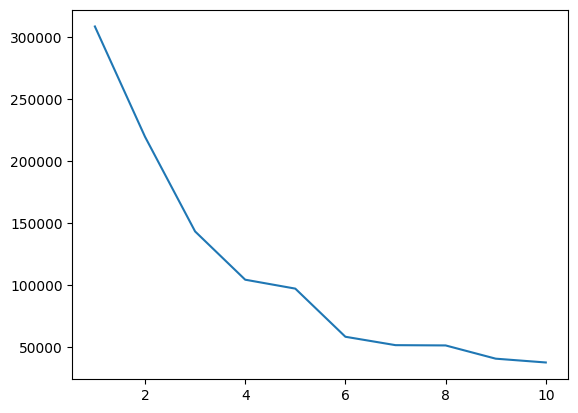

In [156]:
plt.plot(range(1,11),wcss)

In [157]:
km_6 = KMeans(n_clusters=6)
km_5 = KMeans(n_clusters=5)

In [158]:
km_6.fit_predict(df)

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 5, 3, 5, 0, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

In [159]:
km_5.fit_predict(df)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3,
       2, 3, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3,
       4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3,
       3, 4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4,
       4, 3, 4, 3, 3, 3, 4, 4, 4, 4, 3, 4, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [160]:
df['prediction_5'] = km_5.fit_predict(df)

In [161]:
df['prediction_6'] = km_6.fit_predict(df)

In [162]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),prediction_5,prediction_6
0,1,19,15,39,2,4
1,1,21,15,81,0,2
2,0,20,16,6,2,4
3,0,23,16,77,0,2
4,0,31,17,40,2,4


In [163]:
fig = go.Figure(data=[go.Scatter3d(
    x=df['Age'],  # x coordinates
    y=df['Annual Income (k$)'],  # y coordinates
    z=df['Spending Score (1-100)'],  # z coordinates
    mode='markers',  # display points
    marker=dict(
        size=5,
        color=df['prediction_5'],  # set color based on hue factor
        colorscale='Viridis',  # color scale
        opacity=1,
        colorbar=dict(title="Hue Factor")  # colorbar legend for hue factor
    )
)])


fig.update_layout(
    scene=dict(
        xaxis_title='AGE',
        yaxis_title='ANNUAL INCOME',
        zaxis_title='SPENDING SCORE'
    ),
    title="MALL CUSTOMER SEGREGATION 5 segement ",
    height = 600
    # width = 1000
)


fig.show()

In [231]:
fig = go.Figure(data=[go.Scatter3d(
    x=df['Age'],  # x coordinates
    y=df['Annual Income (k$)'],  # y coordinates
    z=df['Spending Score (1-100)'],  # z coordinates
    mode='markers',  # display points
    marker=dict(
        size=5,
        color=df['prediction_6'],  # set color based on hue factor
        colorscale='Viridis',  # color scale
        opacity=1,
        colorbar=dict(title="Hue Factor")  # colorbar legend for hue factor
    )
)])


fig.update_layout(
    scene=dict(
        xaxis_title='AGE',
        yaxis_title='ANNUAL INCOME',
        zaxis_title='SPENDING SCORE'
    ),
    title="MALL CUSTOMER SEGREGATION 6 SEGMENTS",
    height = 600
)


fig.show()

# Conclusion
- I have decided to segregate the customers into 6 categories by analysing the data by ploting the graphs using plotly 
- I have created a tabel with the segregation of the data

In [165]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),prediction_5,prediction_6
0,1,19,15,39,2,4
1,1,21,15,81,0,2
2,0,20,16,6,2,4
3,0,23,16,77,0,2
4,0,31,17,40,2,4
...,...,...,...,...,...,...
195,0,35,120,79,1,3
196,0,45,126,28,3,0
197,1,32,126,74,1,3
198,1,32,137,18,3,0


In [167]:
df_copy

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [133]:
from sklearn.preprocessing import StandardScaler

In [189]:
scaler = StandardScaler()

In [202]:
df_scaled = scaler.fit_transform(df_copy.iloc[:,1:])

In [210]:
df_ = pd.DataFrame(df_scaled)

In [213]:
df_['Gender'] = df_copy['Gender']
df_

,0,1,2,Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


In [203]:
df_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [204]:
km = KMeans()

In [220]:
wcss = []

for i in range(1, 21):
    km = KMeans(n_clusters=i)
    km.fit_predict(df_.values)
    wcss.append(km.inertia_)
    

In [221]:
wcss

[649.2799999999999,
 438.52241155677746,
 346.0375547714671,
 254.40989633765145,
 217.55927914121187,
 205.50798189443427,
 169.75156237449426,
 154.5403544449535,
 145.41406072611235,
 133.55672892469966,
 122.06133988606396,
 119.28011985003278,
 108.55389383148724,
 103.61624086359436,
 97.4570591093472,
 85.852669649116,
 88.9196044240149,
 86.04738202975834,
 74.66508346612753,
 71.69589540586458]

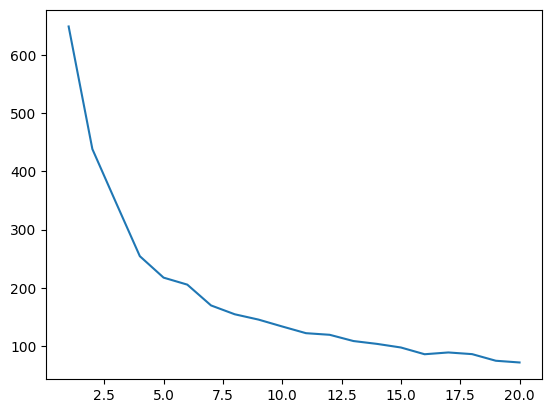

In [222]:
plt.plot(range(1,21), wcss)

In [226]:
fig = go.Figure(data=[go.Scatter3d(
    x=df_[0],  # x coordinates
    y=df_[1],  # y coordinates
    z=df_[2],  # z coordinates
    mode='markers',  # display points
    marker=dict(
        size=5,
        color=df_['Gender'],  # set color based on hue factor
        colorscale='Viridis',  # color scale
        opacity=1,
        colorbar=dict(title="Hue Factor")  # colorbar legend for hue factor
    )
)])


fig.update_layout(
    scene=dict(
        xaxis_title='AGE',
        yaxis_title='ANNUAL INCOME',
        zaxis_title='SPENDING SCORE'
    ),
    title="MALL CUSTOMER SEGREGATION",
    height = 600
)


fig.show()

- review after scaling the data for the optimization
- but scaling the data makes more complexity for the KMeans algorithm to segregate the data
- Finnaly with scaling the data only we are classifying the data into 6 categories.

In [227]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),prediction_5,prediction_6
0,1,19,15,39,2,4
1,1,21,15,81,0,2
2,0,20,16,6,2,4
3,0,23,16,77,0,2
4,0,31,17,40,2,4
...,...,...,...,...,...,...
195,0,35,120,79,1,3
196,0,45,126,28,3,0
197,1,32,126,74,1,3
198,1,32,137,18,3,0


In [228]:
df_final = df.drop("prediction_5", axis = 1)

In [229]:
df_final

,Gender,Age,Annual Income (k$),Spending Score (1-100),prediction_6
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,3
196,0,45,126,28,0
197,1,32,126,74,3
198,1,32,137,18,0


In [232]:
fig = go.Figure(data=[go.Scatter3d(
    x=df['Age'],  # x coordinates
    y=df['Annual Income (k$)'],  # y coordinates
    z=df['Spending Score (1-100)'],  # z coordinates
    mode='markers',  # display points
    marker=dict(
        size=5,
        color=df['prediction_6'],  # set color based on hue factor
        colorscale='Viridis',  # color scale
        opacity=1,
        colorbar=dict(title="Hue Factor")  # colorbar legend for hue factor
    )
)])


fig.update_layout(
    scene=dict(
        xaxis_title='AGE',
        yaxis_title='ANNUAL INCOME',
        zaxis_title='SPENDING SCORE'
    ),
    title="MALL CUSTOMER SEGREGATION 6 SEGMENTS",
    height = 600
)


fig.show()